<a href="https://colab.research.google.com/github/FeisTfue/distancias-clustering/blob/main/Distancia_coseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La distancia del coseno se utiliza para medir la similitud angular entre los puntos, por lo que los puntos se agruparán en función de sus direcciones en lugar de sus distancias euclidianas.

Puntos en el primer clúster:
[array([185,  72]), array([179,  68]), array([182,  72]), array([188,  77])]

Puntos en el segundo clúster:
[array([170,  56]), array([168,  60])]


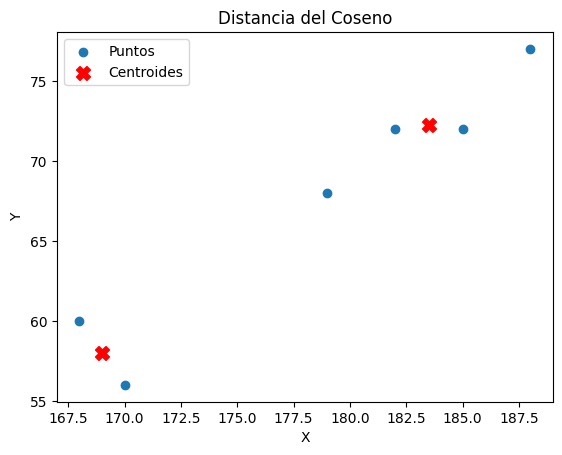

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [185, 72],
    [170, 56],
    [168, 60],
    [179, 68],
    [182, 72],
    [188, 77]
])

# centroides iniciales
k1 = np.array([185, 72])
k2 = np.array([170, 56])

# Inicializamos dos listas para asignar puntos a los clusters 1 y 2.
cluster1 = []
cluster2 = []

num_iteraciones = 10
for _ in range(num_iteraciones):
    # En cada iteración, asignamos los puntos a los centroides más cercanos.
    cluster1 = []
    cluster2 = []

    for punto in data:
        # Calculamos la distancia del coseno entre el punto y el centroide k1.
        distancia_a_k1 = 1 - np.dot(punto, k1) / (np.linalg.norm(punto) * np.linalg.norm(k1))

        # Calculamos la distancia del coseno entre el punto y el centroide k2.
        distancia_a_k2 = 1 - np.dot(punto, k2) / (np.linalg.norm(punto) * np.linalg.norm(k2))

        # Asignamos el punto al cluster con el centroide más cercano (menor distancia de coseno).
        if distancia_a_k1 < distancia_a_k2:
            cluster1.append(punto)
        else:
            cluster2.append(punto)

    # Actualizamos los centroides tomando la media de los puntos en cada cluster.
    k1 = np.mean(cluster1, axis=0)
    k2 = np.mean(cluster2, axis=0)

# Imprimimos los resultados de clustering.
print("Puntos en el primer clúster:")
print(cluster1)

print("\nPuntos en el segundo clúster:")
print(cluster2)

# Graficamos los puntos y los centroides.
centroides = np.array([k1, k2])

plt.scatter(data[:, 0], data[:, 1], label='Puntos')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=100, c='red', label='Centroides')

# Personalizamos el gráfico con títulos y leyendas.
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distancia del Coseno')
plt.legend()
plt.show()
